## Кейс по применению передовых средств и методов аналитики в реальных проектах.

#### Объект: 
Алабяно-Балтийский тоннель
#### Конечный пользователь: 
ГБУ "Гормост"
#### Подсистема: 
### "Автоматическая система контроля параметров газовоздушной среды" 

#### Задача: 
Прогнозировать потребность в обслуживании приборов безопасности газовоздушной среды, с тем чтобы заблаговременно детектировать интенсивность отказов по наработке, не дожидаясь его внезапных отказов, и тем самым избегать перебоев в работе и ненужных операций по текущему обслуживанию.

#### Прибор безопасности газовоздушной среды: 
газоанализатор оксида углерода (CO). Предназначается для автоматических непрерывных измерений массовой концентрации оксида углерода в воздухе.
### Средняя наработка на отказ 10000 ч = 416 дней 

В составе платформы промышленной аналитики должны быть средства для решения основных задач, возникающих в контексте промышленного производства, включая сопряжение по данным, осуществление конкретных видов анализа и непрерывное совершенствование.

### 1. Мнемосхема тоннеля с газоанализаторами

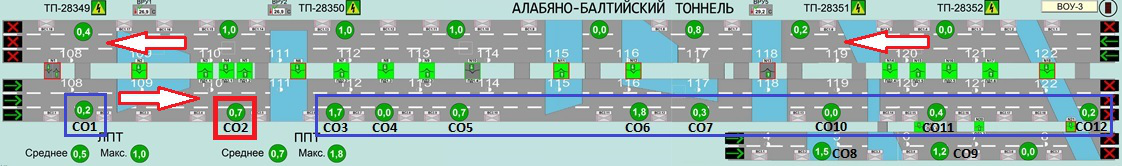

In [1]:
from PIL import Image
img_Wall = Image.open('Wall_select .jpg')
img_Model = Image.open('Model.jpg')
img_Wall

### 2. Структура модели (9 входных признаков, выходной признак -  газоанализатор №2)

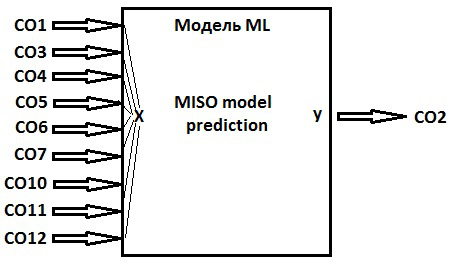

In [2]:
img_Model

### 3. Подключение библиотек

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline

### 4. Импорт датасета

In [3]:
df = pd.read_excel('dataset_gas.xlsx', sheet_name='Лист1')
stabilizerData = df.fillna(df.mean()) # заполенение пустых ячеек

### 5. Предобработка данных

In [4]:
# удадение 2-х первых столбцов 
del stabilizerData["Время"]
del stabilizerData["мс"]

# удаление датчиков левого тоннеля и бокового съезда
del stabilizerData["СО_8"]
del stabilizerData["СО_9"]
del stabilizerData["СО_13"]
del stabilizerData["СО_14"]
del stabilizerData["СО_15"]
del stabilizerData["СО_16"]
del stabilizerData["СО_17"]
del stabilizerData["СО_18"]
del stabilizerData["СО_19"]
del stabilizerData["СО_20"]
del stabilizerData["СО_21"]

### 6. Просмотр данных в табличном виде

In [5]:
stabilizerData.head(n=3)

,СО_1,СО_2,СО_3,СО_4,СО_5,СО_6,СО_7,СО_10,СО_11,СО_12
0,0.384463,0.323807,0.979014,0.999967,0.675430,1.734727,1.056925,0.732271,0.828579,1.750421
1,0.384791,0.312744,0.987615,1.010003,0.675293,1.729254,1.054576,0.741911,0.834970,1.756245
2,0.381235,0.324568,0.994433,0.999093,0.676280,1.731125,1.055233,0.744453,0.828261,1.755187


### 7. Корреляция признаков

In [6]:
processCorrelations = stabilizerData.corr(method='pearson')

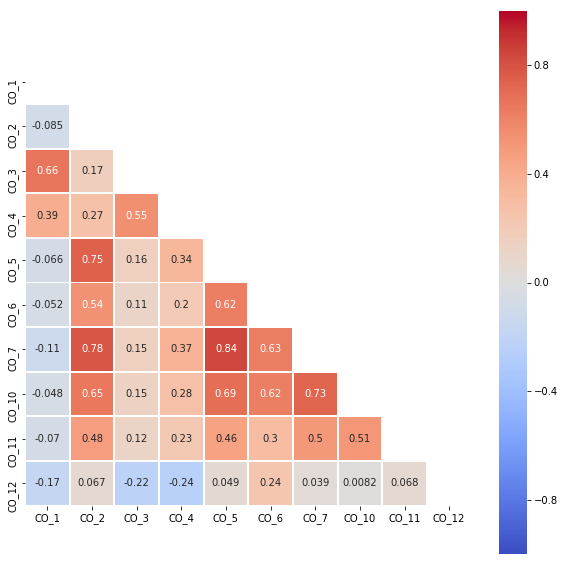

In [34]:
mask = np.zeros_like(processCorrelations, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(
    data=processCorrelations,
    mask=mask,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    linewidths=1,
    square=True,
    annot=True,
    ax=ax
)

### 8. Нормализация данных

In [7]:
# перечисление названий признаков
np.set_printoptions(suppress=True)
numeric_feature_names = ['СО_1', 'СО_2', 'СО_3', 'СО_4', 'СО_5', 'СО_6', 'СО_7', 'СО_10', 'СО_11', 'СО_12']

In [8]:
# задание признаков
feature_names = ['СО_1', 'СО_2', 'СО_3', 'СО_4', 'СО_5', 'СО_6', 'СО_7', 'СО_10', 'СО_11', 'СО_12']
training_features = stabilizerData[feature_names]

In [9]:
# Standardized Scaling
ss = StandardScaler() 
ss.fit(training_features[numeric_feature_names])
training_features[numeric_feature_names] = ss.transform(training_features[numeric_feature_names])

# Min-Max Scaling
#mms = MinMaxScaler() 
#mms.fit(training_features[numeric_feature_names])
#training_features[numeric_feature_names] = mms.transform(training_features[numeric_feature_names])

# Robust Scaling
#rs = RobustScaler()
#rs.fit(training_features[numeric_feature_names])
#training_features[numeric_feature_names] = rs.transform(training_features[numeric_feature_names])

### 9. Просмотр нормализованных данных

In [10]:
# просмотр признаков
training_features.head(n=3)

,СО_1,СО_2,СО_3,СО_4,СО_5,СО_6,СО_7,СО_10,СО_11,СО_12
0,-0.283728,-1.391264,-0.849504,-1.069208,-2.052328,-0.411832,-0.890122,-2.073733,-1.475433,-1.325892
1,-0.272673,-2.143506,-0.513486,-0.464654,-2.068869,-0.797233,-1.047458,-1.413853,-0.741872,-0.489173
2,-0.392522,-1.339519,-0.247125,-1.121856,-1.949705,-0.665480,-1.003452,-1.239847,-1.511933,-0.641173


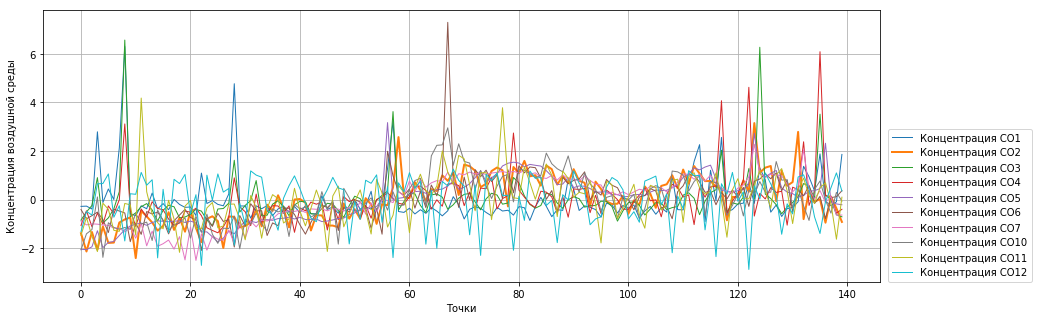

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(training_features["СО_1"], linewidth=1, label="Концентрация CO1")
plt.plot(training_features["СО_2"], linewidth=2, label="Концентрация CO2")
plt.plot(training_features["СО_3"], linewidth=1, label="Концентрация CO3")
plt.plot(training_features["СО_4"], linewidth=1, label="Концентрация CO4")
plt.plot(training_features["СО_5"], linewidth=1, label="Концентрация CO5")
plt.plot(training_features["СО_6"], linewidth=1, label="Концентрация CO6")
plt.plot(training_features["СО_7"], linewidth=1, label="Концентрация CO7")
plt.plot(training_features["СО_10"], linewidth=1, label="Концентрация CO10")
plt.plot(training_features["СО_11"], linewidth=1, label="Концентрация CO11")
plt.plot(training_features["СО_12"], linewidth=1, label="Концентрация CO12")
plt.legend(loc=(1.01, 0))
plt.xlabel("Точки")
plt.ylabel("Концентрация воздушной среды")
plt.grid()

### 10. Построение модели

In [11]:
X = training_features.drop('СО_2', axis=1)
y = training_features['СО_2']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) # просмотр признаков

print("Размер обучающего набора:", X_train.shape[0])
print("Кол-во признаков обучающих (предикторов):", X_train.shape[1])
print("\n")
print("Размер тестового набора:", X_test.shape[0])
print("Кол-во признаков тестовых (предикторов):", X_test.shape[1])

Размер обучающего набора: 98
Кол-во признаков обучающих (предикторов): 9


Размер тестового набора: 42
Кол-во признаков тестовых (предикторов): 9


### 11. Обучение модели

- ##### 11.a Линейная регрессия

In [16]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(X_train, y_train)
print("Линейная регрессия:")
print("Корреляция на тестовом наборе R^2: {:.4f}".format(linReg.score(X_test, y_test)))
print("Корреляция на обучающем наборе R^2: {:.4f}".format(linReg.score(X_train, y_train)))

Линейная регрессия:
Корреляция на тестовом наборе R^2: 0.1959
Корреляция на обучающем наборе R^2: 0.7890


In [17]:
Xcolumns = list(X_train.columns.values)
pd.DataFrame(
    data=[[linReg.intercept_] + list(linReg.coef_)],
    columns=(['Постоянный коэф'] + Xcolumns),
    index=['Коэффициенты линейной регрессии:']
).T

,Коэффициенты линейной регрессии:
Постоянный коэф,0.071190
СО_1,-0.078053
СО_3,0.114990
СО_4,-0.054464
СО_5,0.601021
СО_6,-0.042402
СО_7,0.319797
СО_10,0.025309
СО_11,0.014404
СО_12,0.097035


In [18]:
# сделать прогноз
y_pred_linReg = linReg.predict(X)

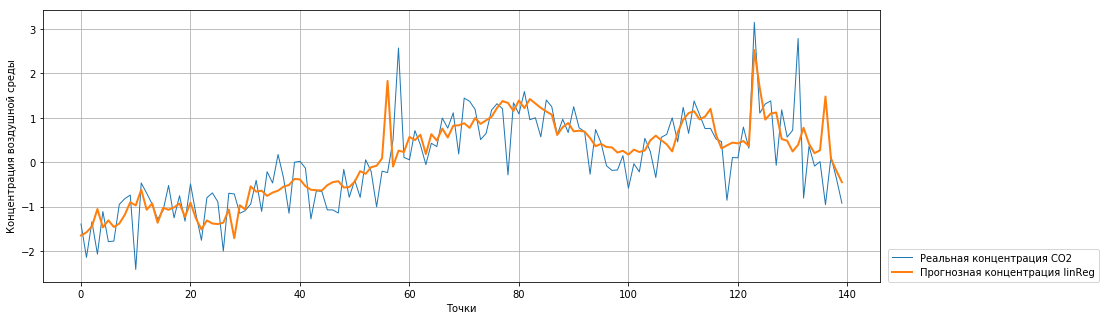

In [19]:
plt.figure(figsize=(15, 5))
plt.plot(y, linewidth=1, label="Реальная концентрация CO2")
plt.plot(y_pred_linReg, linewidth=2, label="Прогнозная концентрация linReg")
plt.legend(loc=(1.01, 0))
plt.xlabel("Точки")
plt.ylabel("Концентрация воздушной среды")
plt.grid()

- Качество прогноза линейной регрессии

In [20]:
print("Коэффициент корреляции:")
print("Корреляция на тестовом наборе = {:.4f}".format(linReg.score(X_test, y_test)), ", Корреляция на обучающем наборе = {:.4f}".format(linReg.score(X_train, y_train)))
print("Квадратный корень из среднеквадратической ошибки:")
print("linReg RSME = {:.4f}".format(np.sqrt(mean_squared_error(y, y_pred_linReg))))
print("Средняя абсолютная ошибка:")
print("linReg MAE = {:.4f}".format(mean_absolute_error(y, y_pred_linReg)))

Коэффициент корреляции:
Корреляция на тестовом наборе = 0.1959 , Корреляция на обучающем наборе = 0.7890
Квадратный корень из среднеквадратической ошибки:
linReg RSME = 0.6186
Средняя абсолютная ошибка:
linReg MAE = 0.4360


- ##### 11.б Линейная регрессия (Ridge). Метод регуляризации Тихонова

In [21]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge().fit(X_train, y_train)
print("Линейная регрессия (Ridge):")
print("Корреляция на тестовом наборе R^2: {:.4f}".format(ridgeReg.score(X_test, y_test)))
print("Корреляция на обучающем наборе R^2: {:.4f}".format(ridgeReg.score(X_train, y_train)))

Линейная регрессия (Ridge):
Корреляция на тестовом наборе R^2: 0.2134
Корреляция на обучающем наборе R^2: 0.7889


In [22]:
Xcolumns = list(X_train.columns.values)
pd.DataFrame(
    data=[[ridgeReg.intercept_] + list(ridgeReg.coef_)],
    columns=(['Постоянный коэф'] + Xcolumns),
    index=['Коэффициенты линейной регрессии (Ridge):']
).T

,Коэффициенты линейной регрессии (Ridge):
Постоянный коэф,0.071876
СО_1,-0.078574
СО_3,0.111535
СО_4,-0.050950
СО_5,0.573548
СО_6,-0.024539
СО_7,0.323642
СО_10,0.030344
СО_11,0.019042
СО_12,0.093386


In [23]:
# сделать прогноз
y_pred_ridgeReg = ridgeReg.predict(X)

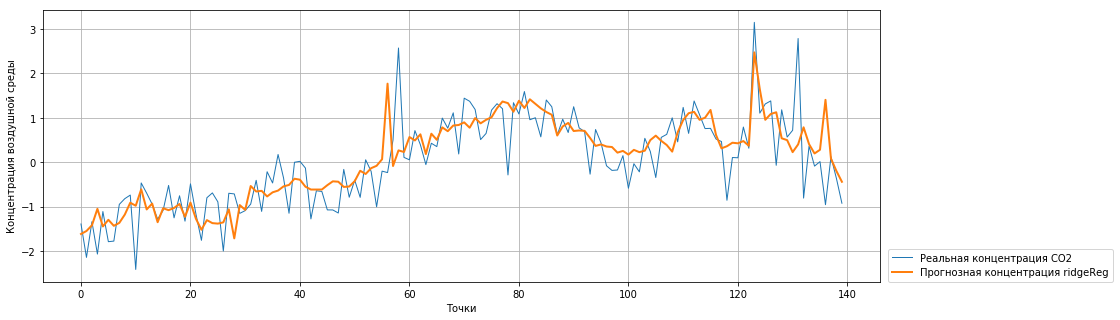

In [24]:
plt.figure(figsize=(15, 5))
plt.plot(y, linewidth=1, label="Реальная концентрация CO2")
plt.plot(y_pred_ridgeReg, linewidth=2, label="Прогнозная концентрация ridgeReg")
plt.legend(loc=(1.01, 0))
plt.xlabel("Точки")
plt.ylabel("Концентрация воздушной среды")
plt.grid()

- Качество прогноза линейной регрессии (Ridge)

In [25]:
print("Коэффициент корреляции:")
print("Корреляция на тестовом наборе = {:.4f}".format(ridgeReg.score(X_test, y_test)), ", Корреляция на обучающем наборе = {:.4f}".format(ridgeReg.score(X_train, y_train)))
print("Квадратный корень из среднеквадратической ошибки:")
print("ridgeReg RSME = {:.4f}".format(np.sqrt(mean_squared_error(y, y_pred_ridgeReg))))
print("Средняя абсолютная ошибка:")
print("ridgeReg MAE = {:.4f}".format(mean_absolute_error(y, y_pred_ridgeReg)))

Коэффициент корреляции:
Корреляция на тестовом наборе = 0.2134 , Корреляция на обучающем наборе = 0.7889
Квадратный корень из среднеквадратической ошибки:
ridgeReg RSME = 0.6145
Средняя абсолютная ошибка:
ridgeReg MAE = 0.4340


- ##### 11.в Линейная регрессия (Lasso регуляризацией).

In [26]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.1).fit(X_train, y_train)
print("Линейная регрессия (Lasso):")
print("Корреляция на тестовом наборе R^2: {:.4f}".format(lassoReg.score(X_test, y_test)))
print("Корреляция на обучающем наборе R^2: {:.4f}".format(lassoReg.score(X_train, y_train)))
print("Кол-во главных признаков: {}".format(np.sum(lassoReg.coef_ != 0)))

Линейная регрессия (Lasso):
Корреляция на тестовом наборе R^2: 0.2789
Корреляция на обучающем наборе R^2: 0.7612
Кол-во главных признаков: 2


In [27]:
Xcolumns = list(X_train.columns.values)
pd.DataFrame(
    data=[[lassoReg.intercept_] + list(lassoReg.coef_)],
    columns=(['Постоянный коэф'] + Xcolumns),
    index=['Коэффициенты линейной регрессии (Lasso):']
).T

,Коэффициенты линейной регрессии (Lasso):
Постоянный коэф,0.069193
СО_1,-0.000000
СО_3,0.000000
СО_4,-0.000000
СО_5,0.534305
СО_6,0.000000
СО_7,0.288084
СО_10,0.000000
СО_11,0.000000
СО_12,0.000000


In [28]:
# сделать прогноз
y_pred_lassoReg = lassoReg.predict(X)

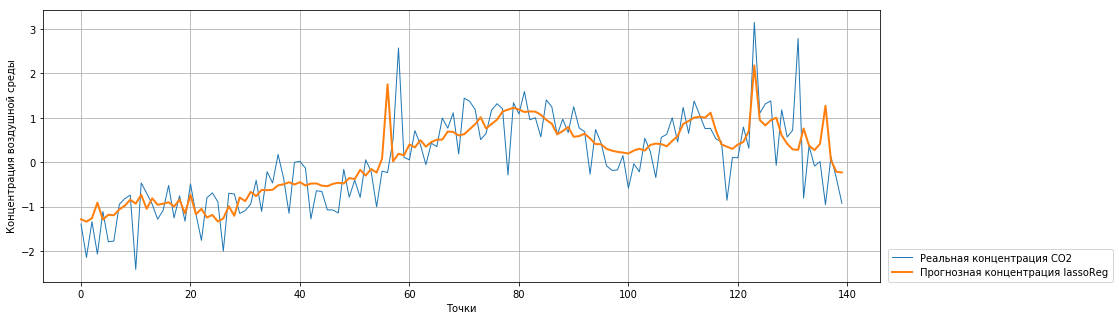

In [29]:
plt.figure(figsize=(15, 5))
plt.plot(y, linewidth=1, label="Реальная концентрация CO2")
plt.plot(y_pred_lassoReg, linewidth=2, label="Прогнозная концентрация lassoReg")
plt.legend(loc=(1.01, 0))
plt.xlabel("Точки")
plt.ylabel("Концентрация воздушной среды")
plt.grid()

- Качество прогноза линейной регрессии (Lasso)

In [30]:
print("Коэффициент корреляции:")
print("Корреляция на тестовом наборе = {:.4f}".format(lassoReg.score(X_test, y_test)), ", Корреляция на обучающем наборе = {:.4f}".format(lassoReg.score(X_train, y_train)))
print("Квадратный корень из среднеквадратической ошибки:")
print("lassoReg RSME = {:.4f}".format(np.sqrt(mean_squared_error(y, y_pred_lassoReg))))
print("Средняя абсолютная ошибка:")
print("lassoReg MAE = {:.4f}".format(mean_absolute_error(y, y_pred_lassoReg)))

Коэффициент корреляции:
Корреляция на тестовом наборе = 0.2789 , Корреляция на обучающем наборе = 0.7612
Квадратный корень из среднеквадратической ошибки:
lassoReg RSME = 0.6145
Средняя абсолютная ошибка:
lassoReg MAE = 0.4368


### 12. Настройка гиперпараметров

- ##### 12.а Линейная регрессия (Ridge регуляризацией).

In [31]:
for alpha in [1, 5, 10, 20, 30, 40, 50, 60, 70, 1000]:
    print("\nalpha={}".format(alpha))
    ridgeRegGP = Ridge(alpha=alpha).fit(X_train, y_train)
    print("Корреляция на тестовом наборе R^2: {:.4f}".format(ridgeRegGP.score(X_test, y_test)))
    print("Корреляция на обучающем наборе R^2: {:.4f}".format(ridgeRegGP.score(X_train, y_train)))


alpha=1
Корреляция на тестовом наборе R^2: 0.2134
Корреляция на обучающем наборе R^2: 0.7889

alpha=5
Корреляция на тестовом наборе R^2: 0.2554
Корреляция на обучающем наборе R^2: 0.7865

alpha=10
Корреляция на тестовом наборе R^2: 0.2817
Корреляция на обучающем наборе R^2: 0.7823

alpha=20
Корреляция на тестовом наборе R^2: 0.3100
Корреляция на обучающем наборе R^2: 0.7736

alpha=30
Корреляция на тестовом наборе R^2: 0.3282
Корреляция на обучающем наборе R^2: 0.7652

alpha=40
Корреляция на тестовом наборе R^2: 0.3421
Корреляция на обучающем наборе R^2: 0.7570

alpha=50
Корреляция на тестовом наборе R^2: 0.3534
Корреляция на обучающем наборе R^2: 0.7490

alpha=60
Корреляция на тестовом наборе R^2: 0.3627
Корреляция на обучающем наборе R^2: 0.7410

alpha=70
Корреляция на тестовом наборе R^2: 0.3704
Корреляция на обучающем наборе R^2: 0.7330

alpha=1000
Корреляция на тестовом наборе R^2: 0.2117
Корреляция на обучающем наборе R^2: 0.3099


In [32]:
ridgeRegGP = Ridge(alpha=70).fit(X_train, y_train)
print("Линейная регрессия (Ridge):")
print("Корреляция на тестовом наборе R^2: {:.4f}".format(ridgeRegGP.score(X_test, y_test)))
print("Корреляция на обучающем наборе R^2: {:.4f}".format(ridgeRegGP.score(X_train, y_train)))
# сделать прогноз
y_pred_ridgeRegGP = ridgeRegGP.predict(X)

Линейная регрессия (Ridge):
Корреляция на тестовом наборе R^2: 0.3704
Корреляция на обучающем наборе R^2: 0.7330


In [33]:
print("Коэффициент корреляции:")
print("Корреляция на тестовом наборе = {:.4f}".format(ridgeRegGP.score(X_test, y_test)), ", Корреляция на обучающем наборе = {:.4f}".format(ridgeRegGP.score(X_train, y_train)))
print("Квадратный корень из среднеквадратической ошибки:")
print("ridgeReg RSME = {:.4f}".format(np.sqrt(mean_squared_error(y, y_pred_ridgeRegGP))))
print("Средняя абсолютная ошибка:")
print("ridgeReg MAE = {:.4f}".format(mean_absolute_error(y, y_pred_ridgeRegGP)))

Коэффициент корреляции:
Корреляция на тестовом наборе = 0.3704 , Корреляция на обучающем наборе = 0.7330
Квадратный корень из среднеквадратической ошибки:
ridgeReg RSME = 0.6086
Средняя абсолютная ошибка:
ridgeReg MAE = 0.4462


- ##### 12.б Линейная регрессия (Lasso регуляризацией).

In [34]:
from sklearn.linear_model import Lasso
for alpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    print("\nalpha={}".format(alpha))
    lassoRegGP = Lasso(alpha=alpha, max_iter=100).fit(X_train, y_train)
    print("Корреляция на тестовом наборе R^2: {:.4f}".format(lassoRegGP.score(X_test, y_test)))
    print("Корреляция на обучающем наборе R^2: {:.4f}".format(lassoRegGP.score(X_train, y_train)))    
    print("Кол-во главных признаков: {}".format(np.sum(lassoRegGP.coef_ != 0)))


alpha=0.1
Корреляция на тестовом наборе R^2: 0.2789
Корреляция на обучающем наборе R^2: 0.7612
Кол-во главных признаков: 2

alpha=0.2
Корреляция на тестовом наборе R^2: 0.3160
Корреляция на обучающем наборе R^2: 0.7267
Кол-во главных признаков: 2

alpha=0.3
Корреляция на тестовом наборе R^2: 0.3257
Корреляция на обучающем наборе R^2: 0.6692
Кол-во главных признаков: 2

alpha=0.4
Корреляция на тестовом наборе R^2: 0.3079
Корреляция на обучающем наборе R^2: 0.5887
Кол-во главных признаков: 2

alpha=0.5
Корреляция на тестовом наборе R^2: 0.2625
Корреляция на обучающем наборе R^2: 0.4852
Кол-во главных признаков: 2

alpha=0.6
Корреляция на тестовом наборе R^2: 0.1896
Корреляция на обучающем наборе R^2: 0.3587
Кол-во главных признаков: 2

alpha=0.7
Корреляция на тестовом наборе R^2: 0.0891
Корреляция на обучающем наборе R^2: 0.2093
Кол-во главных признаков: 2


In [35]:
lassoRegGP = Lasso(alpha=0.3, max_iter=100).fit(X_train, y_train)
print("Линейная регрессия (Lasso):")
print("Корреляция на тестовом наборе R^2: {:.4f}".format(lassoRegGP.score(X_test, y_test)))
print("Корреляция на обучающем наборе R^2: {:.4f}".format(lassoRegGP.score(X_train, y_train)))
# сделать прогноз
y_pred_lassoRegGP = lassoRegGP.predict(X)

Линейная регрессия (Lasso):
Корреляция на тестовом наборе R^2: 0.3257
Корреляция на обучающем наборе R^2: 0.6692


In [36]:
print("Коэффициент корреляции:")
print("Корреляция на тестовом наборе = {:.4f}".format(lassoRegGP.score(X_test, y_test)), ", Корреляция на обучающем наборе = {:.4f}".format(lassoRegGP.score(X_train, y_train)))
print("Квадратный корень из среднеквадратической ошибки:")
print("lassoReg RSME = {:.4f}".format(np.sqrt(mean_squared_error(y, y_pred_lassoRegGP))))
print("Средняя абсолютная ошибка:")
print("lassoReg MAE = {:.4f}".format(mean_absolute_error(y, y_pred_lassoRegGP)))

Коэффициент корреляции:
Корреляция на тестовом наборе = 0.3257 , Корреляция на обучающем наборе = 0.6692
Квадратный корень из среднеквадратической ошибки:
lassoReg RSME = 0.6542
Средняя абсолютная ошибка:
lassoReg MAE = 0.4752


### 13. Регрессия с L1 и L2 регуляризацией (эластическая сеть)

In [37]:
from sklearn.linear_model import ElasticNet
elasticNet = ElasticNet(alpha=0.1, random_state=0).fit(X_train, y_train)
print("Линейная регрессия (ElasticNet):")
print("Корреляция на тестовом наборе R^2: {:.4f}".format(elasticNet.score(X_test, y_test)))
print("Корреляция на обучающем наборе R^2: {:.4f}".format(elasticNet.score(X_train, y_train)))
print("Кол-во главных признаков: {}".format(np.sum(elasticNet.coef_ != 0)))

Линейная регрессия (ElasticNet):
Корреляция на тестовом наборе R^2: 0.2872
Корреляция на обучающем наборе R^2: 0.7728
Кол-во главных признаков: 5


In [38]:
for alpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
  for l1_ratio in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:  
        print("\nalpha={}".format(alpha),"\nl1_ratio={}".format(l1_ratio))
        print("---------------")
        elasticNetGP = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=0).fit(X_train, y_train)
        print("Корреляция на тестовом наборе R^2: {:.4f}".format(elasticNetGP.score(X_test, y_test)))
        print("Корреляция на обучающем наборе R^2: {:.4f}".format(elasticNetGP.score(X_train, y_train)))
        print("---------------")
        print("Кол-во главных признаков: {}".format(np.sum(elasticNetGP.coef_ != 0)))


alpha=0.1 
l1_ratio=0.1
---------------
Корреляция на тестовом наборе R^2: 0.2867
Корреляция на обучающем наборе R^2: 0.7816
---------------
Кол-во главных признаков: 9

alpha=0.1 
l1_ratio=0.2
---------------
Корреляция на тестовом наборе R^2: 0.2903
Корреляция на обучающем наборе R^2: 0.7794
---------------
Кол-во главных признаков: 9

alpha=0.1 
l1_ratio=0.3
---------------
Корреляция на тестовом наборе R^2: 0.2915
Корреляция на обучающем наборе R^2: 0.7767
---------------
Кол-во главных признаков: 8

alpha=0.1 
l1_ratio=0.4
---------------
Корреляция на тестовом наборе R^2: 0.2902
Корреляция на обучающем наборе R^2: 0.7747
---------------
Кол-во главных признаков: 7

alpha=0.1 
l1_ratio=0.5
---------------
Корреляция на тестовом наборе R^2: 0.2872
Корреляция на обучающем наборе R^2: 0.7728
---------------
Кол-во главных признаков: 5

alpha=0.1 
l1_ratio=0.6
---------------
Корреляция на тестовом наборе R^2: 0.2831
Корреляция на обучающем наборе R^2: 0.7707
---------------
Кол-во г

Корреляция на тестовом наборе R^2: 0.2198
Корреляция на обучающем наборе R^2: 0.3740
---------------
Кол-во главных признаков: 2

alpha=0.9 
l1_ratio=0.7
---------------
Корреляция на тестовом наборе R^2: 0.1534
Корреляция на обучающем наборе R^2: 0.2775
---------------
Кол-во главных признаков: 2

alpha=0.9 
l1_ratio=0.8
---------------
Корреляция на тестовом наборе R^2: 0.0664
Корреляция на обучающем наборе R^2: 0.1600
---------------
Кол-во главных признаков: 2

alpha=0.9 
l1_ratio=0.9
---------------
Корреляция на тестовом наборе R^2: -0.0387
Корреляция на обучающем наборе R^2: 0.0206
---------------
Кол-во главных признаков: 1

alpha=0.9 
l1_ratio=1
---------------
Корреляция на тестовом наборе R^2: -0.0534
Корреляция на обучающем наборе R^2: 0.0000
---------------
Кол-во главных признаков: 0

alpha=1 
l1_ratio=0.1
---------------
Корреляция на тестовом наборе R^2: 0.4027
Корреляция на обучающем наборе R^2: 0.6654
---------------
Кол-во главных признаков: 5

alpha=1 
l1_ratio=0.2


In [39]:
elasticNetGP = ElasticNet(alpha=0.6, l1_ratio=0.1, random_state=0).fit(X_train, y_train)
print("Линейная регрессия (ElasticNet):")
print("Корреляция на тестовом наборе R^2: {:.4f}".format(elasticNetGP.score(X_test, y_test)))
print("Корреляция на обучающем наборе R^2: {:.4f}".format(elasticNetGP.score(X_train, y_train)))
print("Кол-во главных признаков: {}".format(np.sum(elasticNetGP.coef_ != 0)))
# сделать прогноз
y_pred_elasticNetGP = elasticNetGP.predict(X)

Линейная регрессия (ElasticNet):
Корреляция на тестовом наборе R^2: 0.3903
Корреляция на обучающем наборе R^2: 0.7207
Кол-во главных признаков: 7


In [40]:
Xcolumns = list(X_train.columns.values)
pd.DataFrame(
    data=[[elasticNetGP.intercept_] + list(elasticNetGP.coef_)],
    columns=(['Постоянный коэф'] + Xcolumns),
    index=['Коэффициенты линейной регрессии (ElasticNet):']
).T

,Коэффициенты линейной регрессии (ElasticNet):
Постоянный коэф,0.079246
СО_1,-0.000571
СО_3,0.000000
СО_4,0.000000
СО_5,0.282148
СО_6,0.093899
СО_7,0.251808
СО_10,0.095414
СО_11,0.066750
СО_12,0.011783


In [41]:
print("Коэффициент корреляции:")
print("Корреляция на тестовом наборе = {:.4f}".format(elasticNetGP.score(X_test, y_test)), ", Корреляция на обучающем наборе = {:.4f}".format(elasticNetGP.score(X_train, y_train)))
print("Квадратный корень из среднеквадратической ошибки:")
print("elasticNet RSME = {:.4f}".format(np.sqrt(mean_squared_error(y, y_pred_elasticNetGP))))
print("Средняя абсолютная ошибка:")
print("elasticNet MAE = {:.4f}".format(mean_absolute_error(y, y_pred_elasticNetGP)))

Коэффициент корреляции:
Корреляция на тестовом наборе = 0.3903 , Корреляция на обучающем наборе = 0.7207
Квадратный корень из среднеквадратической ошибки:
elasticNet RSME = 0.6109
Средняя абсолютная ошибка:
elasticNet MAE = 0.4477


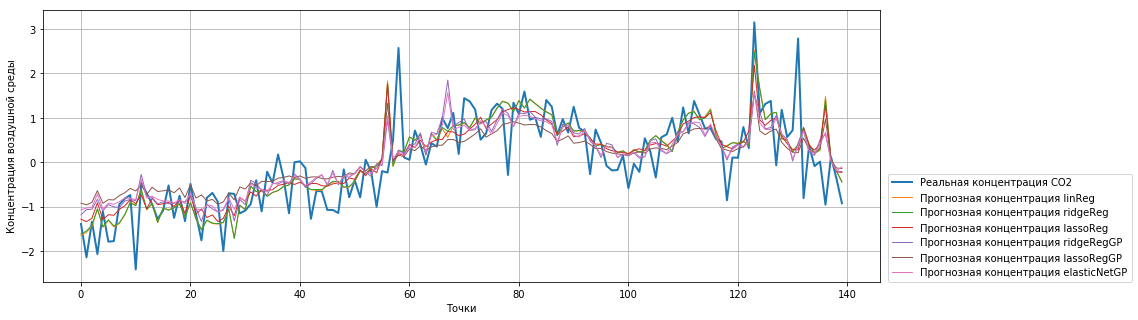

In [42]:
plt.figure(figsize=(15, 5))
plt.plot(y, linewidth=2, label="Реальная концентрация CO2")
plt.plot(y_pred_linReg, linewidth=1, label="Прогнозная концентрация linReg")
plt.plot(y_pred_ridgeReg, linewidth=1, label="Прогнозная концентрация ridgeReg")
plt.plot(y_pred_lassoReg, linewidth=1, label="Прогнозная концентрация lassoReg")
plt.plot(y_pred_ridgeRegGP, linewidth=1, label="Прогнозная концентрация ridgeRegGP")
plt.plot(y_pred_lassoRegGP, linewidth=1, label="Прогнозная концентрация lassoRegGP")
plt.plot(y_pred_elasticNetGP, linewidth=1, label="Прогнозная концентрация elasticNetGP")
plt.legend(loc=(1.01, 0))
plt.xlabel("Точки")
plt.ylabel("Концентрация воздушной среды")
plt.grid()

### 14. Cross-Validation (перекрестная проверка)

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
scores_linReg = cross_val_score(linReg, X_test, y_test, cv=5)
scores_ridgeReg = cross_val_score(ridgeReg, X_test, y_test, cv=5)
scores_lassoReg = cross_val_score(lassoReg, X_test, y_test, cv=5)
scores_ridgeRegGP = cross_val_score(ridgeRegGP, X_test, y_test, cv=5)
scores_lassoRegGP = cross_val_score(lassoRegGP, X_test, y_test, cv=5)
scores_elasticNetGP = cross_val_score(elasticNetGP, X_test, y_test, cv=5)

print("Cross-validation scores linReg: {}".format(scores_linReg))
print("Cross-validation scores ridgeReg: {}".format(scores_ridgeReg))
print("Cross-validation scores lassoReg: {}".format(scores_lassoReg))
print("Cross-validation scores ridgeRegGP: {}".format(scores_ridgeRegGP))
print("Cross-validation scores lassoRegGP: {}".format(scores_lassoRegGP))
print("Cross-validation scores elasticNetGP: {}".format(scores_elasticNetGP))

Cross-validation scores linReg: [ 0.21830217 -1.93818251  0.10117094  0.53886219 -0.77364601]
Cross-validation scores ridgeReg: [ 0.26923168 -1.16582728  0.14823266  0.54403461 -0.15683325]
Cross-validation scores lassoReg: [ 0.60055537 -0.21385978  0.28837423  0.44990986  0.56188333]
Cross-validation scores ridgeRegGP: [0.53762486 0.35756414 0.23297467 0.47351869 0.4233327 ]
Cross-validation scores lassoRegGP: [0.48993322 0.40766763 0.2294527  0.24855867 0.42390616]
Cross-validation scores elasticNetGP: [0.56746206 0.2685697  0.26378028 0.48880016 0.4851685 ]


In [45]:
print("Average cross-validation score linReg: {:.10f}".format(scores_linReg.mean()))
print("Average cross-validation score ridgeReg: {:.10f}".format(scores_ridgeReg.mean()))
print("Average cross-validation score lassoReg: {:.10f}".format(scores_lassoReg.mean()))
print("Average cross-validation score ridgeRegGP: {:.10f}".format(scores_ridgeRegGP.mean()))
print("Average cross-validation score lassoRegGP: {:.10f}".format(scores_lassoRegGP.mean()))
print("Average cross-validation score elasticNetGP: {:.10f}".format(scores_elasticNetGP.mean()))

Average cross-validation score linReg: -0.3706986458
Average cross-validation score ridgeReg: -0.0722323148
Average cross-validation score lassoReg: 0.3373726035
Average cross-validation score ridgeRegGP: 0.4050030126
Average cross-validation score lassoRegGP: 0.3599036743
Average cross-validation score elasticNetGP: 0.4147561394


### 15. Генерация полинома (Interactions and Polynomials)
##### для двухмерной [a, b], полиномиальные признаки степени - 2: [1, a, b, a ^ 2, ab, b ^ 2].

In [46]:
from sklearn.preprocessing import PolynomialFeatures
# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
# degree=2, interaction_only=True, include_bias=False)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)
X_poly = poly.transform(X)
print("Размер обучающего набора: {}".format(X_train_poly.shape))
print("Размер тестового набора: {}".format(X_test_poly.shape))
print("Общий размер выборки: {}".format(X_poly.shape))

Размер обучающего набора: (98, 54)
Размер тестового набора: (42, 54)
Общий размер выборки: (140, 54)


In [47]:
print("Полиномиальные имена признаков:\n{}".format(poly.get_feature_names()))

Полиномиальные имена признаков:
['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x6^2', 'x6 x7', 'x6 x8', 'x7^2', 'x7 x8', 'x8^2']


- Линейная регрессия

In [48]:
linReg_Pol = LinearRegression()
linReg_Pol.fit(X_train_poly, y_train)
print("Линейная регрессия:")
print("Корреляция на тестовом наборе R^2: {:.4f}".format(linReg_Pol.score(X_test_poly, y_test)))
print("Корреляция на обучающем наборе R^2: {:.4f}".format(linReg_Pol.score(X_train_poly, y_train)))

Линейная регрессия:
Корреляция на тестовом наборе R^2: -1.0275
Корреляция на обучающем наборе R^2: 0.8787


- Эластическая сеть

In [49]:
elasticNetGP_Pol = ElasticNet(alpha=0.6, l1_ratio=0.1, random_state=0).fit(X_train_poly, y_train)
print("Линейная регрессия (ElasticNet):")
print("Корреляция на тестовом наборе R^2: {:.4f}".format(elasticNetGP_Pol.score(X_test_poly, y_test)))
print("Корреляция на обучающем наборе R^2: {:.4f}".format(elasticNetGP_Pol.score(X_train_poly, y_train)))
print("Кол-во главных признаков: {}".format(np.sum(elasticNetGP_Pol.coef_ != 0)))
# сделать прогноз
y_pred_elasticNetGP_Pol = elasticNetGP_Pol.predict(X_poly)

Линейная регрессия (ElasticNet):
Корреляция на тестовом наборе R^2: 0.3925
Корреляция на обучающем наборе R^2: 0.7246
Кол-во главных признаков: 13


In [50]:
print("elasticNetGP_Pol_.coef_: {}".format(elasticNetGP_Pol.coef_))
print("elasticNetGP_Pol_.intercept_: {}".format(elasticNetGP_Pol.intercept_))

elasticNetGP_Pol_.coef_: [-0.          0.          0.          0.2805499   0.09291158  0.24991668
  0.09740999  0.06569542  0.00270063 -0.00331954  0.         -0.
  0.          0.          0.         -0.          0.01140823 -0.
  0.00231005 -0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.00152917 -0.         -0.         -0.
 -0.         -0.014211   -0.          0.         -0.          0.
 -0.         -0.00363601  0.          0.          0.         -0.
 -0.          0.          0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.          0.         -0.00893162]
elasticNetGP_Pol_.intercept_: 0.09569883805430804


In [51]:
scores_elasticNetGP_Pol = cross_val_score(elasticNetGP_Pol, X_test_poly, y_test, cv=5)
print("Cross-validation scores elasticNetGP_Pol: {}".format(scores_elasticNetGP_Pol))
print("Average cross-validation score elasticNetGP_Pol: {:.10f}".format(scores_elasticNetGP_Pol.mean()))

Cross-validation scores elasticNetGP_Pol: [0.30930667 0.43389906 0.34261328 0.6435903  0.4864766 ]
Average cross-validation score elasticNetGP_Pol: 0.4431771848


### 16. SVR (метод опорной регрессии, из SVM)

In [52]:
from sklearn.svm import SVR
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1]:
    for C in [0.001, 0.01, 0.1, 1]:
        for epsilon in [0.001, 0.01, 0.1, 1, 10, 100]:
            for degree in [1, 2, 3, 4, 5, 6]:
                # для каждой комбинации параметров тренируем SVR
                svr = SVR(gamma=gamma, C=C, epsilon=epsilon, degree=degree)
                svr.fit(X_train, y_train)
                # оценить SVR на тестовом наборе
                score = svr.score(X_test, y_test)
                # если мы получили лучшую оценку, сохраняем параметры
                if score > best_score:
                    best_score = score
                    best_parameters = {'C': C, 'gamma': gamma, 'epsilon': epsilon, 'degree': degree}

print("Корреляция на тестовом наборе = {:.4f}".format(best_score))
print("Лучшие параметры SVR: {}".format(best_parameters))

Корреляция на тестовом наборе = 0.4398
Лучшие параметры SVR: {'C': 1, 'gamma': 0.1, 'epsilon': 1, 'degree': 1}


In [53]:
svr = SVR(kernel='rbf', gamma=0.1, C=1, epsilon=1, degree=1)
svr.fit(X_train, y_train)
print("SVR регрессия:")
print("Корреляция на тестовом наборе R^2: {:.4f}".format(svr.score(X_test, y_test)))
print("Корреляция на обучающем наборе R^2: {:.4f}".format(svr.score(X_train, y_train)))
# сделать прогноз
y_pred_svr = svr.predict(X)
print("Квадратный корень из среднеквадратической ошибки:")
print("SVR регрессия RSME = {:.4f}".format(np.sqrt(mean_squared_error(y, y_pred_svr))))
print("Средняя абсолютная ошибка:")
print("SVR регрессия MAE = {:.4f}".format(mean_absolute_error(y, y_pred_svr)))

SVR регрессия:
Корреляция на тестовом наборе R^2: 0.4398
Корреляция на обучающем наборе R^2: 0.6494
Квадратный корень из среднеквадратической ошибки:
SVR регрессия RSME = 0.6389
Средняя абсолютная ошибка:
SVR регрессия MAE = 0.4979


In [54]:
scores_svr = cross_val_score(svr, X_test, y_test, cv=5)
print("Cross-validation scores SVR: {}".format(scores_svr))
print("Average cross-validation score SVR: {:.10f}".format(scores_svr.mean()))

Cross-validation scores SVR: [0.28416434 0.34998741 0.27363643 0.51268112 0.22098236]
Average cross-validation score SVR: 0.3282903308


### 17. Результаты

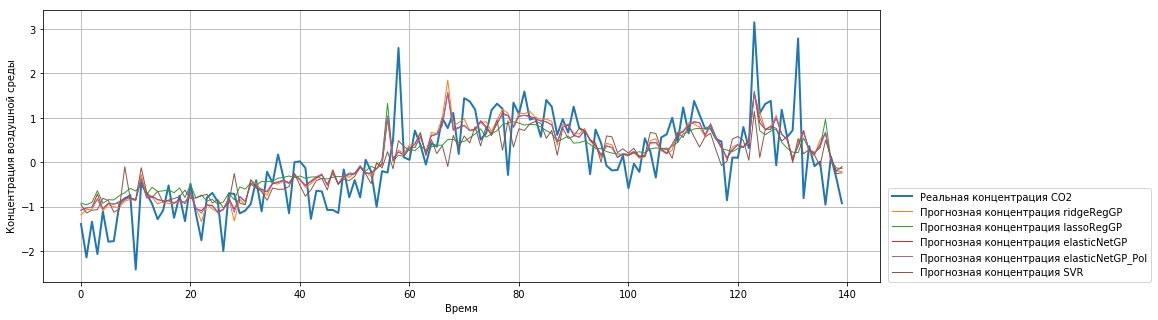

In [55]:
plt.figure(figsize=(15, 5))
plt.plot(y, linewidth=2, label="Реальная концентрация CO2")
plt.plot(y_pred_ridgeRegGP, linewidth=1, label="Прогнозная концентрация ridgeRegGP")
plt.plot(y_pred_lassoRegGP, linewidth=1, label="Прогнозная концентрация lassoRegGP")
plt.plot(y_pred_elasticNetGP, linewidth=1, label="Прогнозная концентрация elasticNetGP")
plt.plot(y_pred_elasticNetGP_Pol, linewidth=1, label="Прогнозная концентрация elasticNetGP_Pol")
plt.plot(y_pred_svr, linewidth=1, label="Прогнозная концентрация SVR")
plt.legend(loc=(1.01, 0))
plt.xlabel("Время")
plt.ylabel("Концентрация воздушной среды")
plt.grid()

### 18. Качество прогноза

In [56]:
print(" ")
print("____________________________________________________________________")
print(" ")
print("Коэффициент корреляции:")
print("ridgeRegGP Test-set R^2 = {:.4f}".format(ridgeRegGP.score(X_test, y_test)), ", ridgeRegGP training set = {:.4f}".format(ridgeRegGP.score(X_train, y_train)))
print("lassoRegGP Test-set R^2 = {:.4f}".format(lassoRegGP.score(X_test, y_test)), ", lassoRegGP training set = {:.4f}".format(lassoRegGP.score(X_train, y_train)))
print("elasticNetGP Test-set R^2 = {:.4f}".format(elasticNetGP.score(X_test, y_test)), ", elasticNetGP training set = {:.4f}".format(elasticNetGP.score(X_train, y_train)))
print("elasticNetGP_Pol Test-set R^2 = {:.4f}".format(elasticNetGP_Pol.score(X_test_poly, y_test)), ", elasticNetGP_Pol training set = {:.4f}".format(elasticNetGP_Pol.score(X_train_poly, y_train)))
print("SVR Test-set R^2 = {:.4f}".format(svr.score(X_test, y_test)), ", SVR training set = {:.4f}".format(svr.score(X_train, y_train)))
print("____________________________________________________________________")
print(" ")
print("Квадратный корень из среднеквадратической ошибки:")
print("ridgeRegGP RSME = {:.4f}".format(np.sqrt(mean_squared_error(y, y_pred_ridgeRegGP))))
print("lassoRegGP RSME = {:.4f}".format(np.sqrt(mean_squared_error(y, y_pred_lassoRegGP))))
print("elasticNetGP RSME = {:.4f}".format(np.sqrt(mean_squared_error(y, y_pred_elasticNetGP))))
print("elasticNetGP_Pol RSME = {:.4f}".format(np.sqrt(mean_squared_error(y, y_pred_elasticNetGP_Pol))))
print("SVR RSME = {:.4f}".format(np.sqrt(mean_squared_error(y, y_pred_svr))))
print(" ")
print("____________________________________________________________________")
print(" ")
print("Средняя абсолютная ошибка:")
print("ridgeRegGP MAE = {:.4f}".format(mean_absolute_error(y, y_pred_ridgeRegGP)))
print("lassoRegGP MAE = {:.4f}".format(mean_absolute_error(y, y_pred_lassoRegGP)))
print("elasticNetGP MAE = {:.4f}".format(mean_absolute_error(y, y_pred_elasticNetGP)))
print("elasticNetGP_Pol MAE = {:.4f}".format(mean_absolute_error(y, y_pred_elasticNetGP_Pol)))
print("SVR MAE = {:.4f}".format(mean_absolute_error(y, y_pred_svr)))
print(" ")
print("____________________________________________________________________")
print(" ")

 
____________________________________________________________________
 
Коэффициент корреляции:
ridgeRegGP Test-set R^2 = 0.3704 , ridgeRegGP training set = 0.7330
lassoRegGP Test-set R^2 = 0.3257 , lassoRegGP training set = 0.6692
elasticNetGP Test-set R^2 = 0.3903 , elasticNetGP training set = 0.7207
elasticNetGP_Pol Test-set R^2 = 0.3925 , elasticNetGP_Pol training set = 0.7246
SVR Test-set R^2 = 0.4398 , SVR training set = 0.6494
____________________________________________________________________
 
Квадратный корень из среднеквадратической ошибки:
ridgeRegGP RSME = 0.6086
lassoRegGP RSME = 0.6542
elasticNetGP RSME = 0.6109
elasticNetGP_Pol RSME = 0.6081
SVR RSME = 0.6389
 
____________________________________________________________________
 
Средняя абсолютная ошибка:
ridgeRegGP MAE = 0.4462
lassoRegGP MAE = 0.4752
elasticNetGP MAE = 0.4477
elasticNetGP_Pol MAE = 0.4445
SVR MAE = 0.4979
 
____________________________________________________________________
 


### 19. Сохранение модели

In [57]:
# сохрание модели после обучения
from joblib import dump, load
dump(ridgeRegGP, 'Model/ridgeRegGP.joblib');
dump(lassoRegGP, 'Model/lassoRegGP.joblib');
dump(elasticNetGP, 'Model/elasticNetGP.joblib');
dump(elasticNetGP_Pol, 'Model/elasticNetGP_Pol.joblib');
dump(SVR, 'Model/SVR.joblib');

### Нейронная сеть

In [46]:
from keras.layers import Input
from keras.layers.core import Dense
from keras.models import Model

Using TensorFlow backend.


In [101]:
# инициализация сети
# два слоя из 12 признаков и выводит масштабированное предсказание
readings = Input(shape=(9,))
x = Dense(10, activation="relu", kernel_initializer="glorot_uniform")(readings)
benzene = Dense(1, kernel_initializer="glorot_uniform")(x)

ModelNNReg = Model(inputs=[readings], outputs=[benzene])
ModelNNReg.compile(loss="mae", optimizer="rmsprop")
# sgd, adam, rmsprop

In [102]:
# обучение нейросети
# на протяжении 20 периодов с размером пакета 10
NUM_EPOCHS = 200
BATCH_SIZE = 5

history = ModelNNReg.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_split=0.33)

Train on 65 samples, validate on 33 samples
Epoch 1/200
65/65 [==============================] - 1s 12ms/step - loss: 0.8109 - val_loss: 0.6141
Epoch 2/200
65/65 [==============================] - 0s 618us/step - loss: 0.7123 - val_loss: 0.5531
Epoch 3/200
65/65 [==============================] - 0s 582us/step - loss: 0.6596 - val_loss: 0.5201
Epoch 4/200
65/65 [==============================] - 0s 436us/step - loss: 0.6225 - val_loss: 0.4927
Epoch 5/200
65/65 [==============================] - 0s 421us/step - loss: 0.5885 - val_loss: 0.4695
Epoch 6/200
65/65 [==============================] - 0s 400us/step - loss: 0.5604 - val_loss: 0.4482
Epoch 7/200
65/65 [==============================] - 0s 467us/step - loss: 0.5350 - val_loss: 0.4301
Epoch 8/200
65/65 [==============================] - 0s 657us/step - loss: 0.5169 - val_loss: 0.4175
Epoch 9/200
65/65 [==============================] - 0s 481us/step - loss: 0.5017 - val_loss: 0.4099
Epoch 10/200
65/65 [============================

65/65 [==============================] - 0s 416us/step - loss: 0.2982 - val_loss: 0.4050
Epoch 82/200
65/65 [==============================] - 0s 417us/step - loss: 0.2972 - val_loss: 0.4059
Epoch 83/200
65/65 [==============================] - 0s 446us/step - loss: 0.2949 - val_loss: 0.4076
Epoch 84/200
65/65 [==============================] - 0s 496us/step - loss: 0.2937 - val_loss: 0.4056
Epoch 85/200
65/65 [==============================] - 0s 464us/step - loss: 0.2948 - val_loss: 0.4075
Epoch 86/200
65/65 [==============================] - 0s 422us/step - loss: 0.2944 - val_loss: 0.4088
Epoch 87/200
65/65 [==============================] - 0s 434us/step - loss: 0.2941 - val_loss: 0.4062
Epoch 88/200
65/65 [==============================] - 0s 445us/step - loss: 0.2907 - val_loss: 0.4081
Epoch 89/200
65/65 [==============================] - 0s 411us/step - loss: 0.2914 - val_loss: 0.4089
Epoch 90/200
65/65 [==============================] - 0s 569us/step - loss: 0.2913 - val_loss: 

Epoch 161/200
65/65 [==============================] - 0s 395us/step - loss: 0.2464 - val_loss: 0.4217
Epoch 162/200
65/65 [==============================] - 0s 399us/step - loss: 0.2463 - val_loss: 0.4235
Epoch 163/200
65/65 [==============================] - 0s 444us/step - loss: 0.2458 - val_loss: 0.4198
Epoch 164/200
65/65 [==============================] - 0s 447us/step - loss: 0.2429 - val_loss: 0.4194
Epoch 165/200
65/65 [==============================] - 0s 433us/step - loss: 0.2422 - val_loss: 0.4244
Epoch 166/200
65/65 [==============================] - 0s 452us/step - loss: 0.2436 - val_loss: 0.4186
Epoch 167/200
65/65 [==============================] - 0s 402us/step - loss: 0.2426 - val_loss: 0.4296
Epoch 168/200
65/65 [==============================] - 0s 444us/step - loss: 0.2421 - val_loss: 0.4197
Epoch 169/200
65/65 [==============================] - 0s 415us/step - loss: 0.2398 - val_loss: 0.4187
Epoch 170/200
65/65 [==============================] - 0s 401us/step - lo

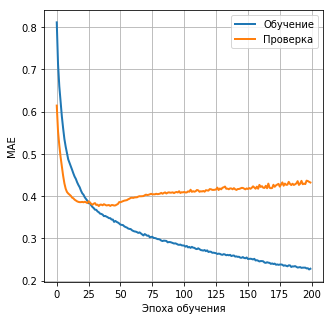

In [103]:
# ошибка обучения MSE
from matplotlib import pyplot
pyplot.figure(figsize=(5, 5))
pyplot.plot(history.history['loss'], linewidth=2, label='Обучение')
pyplot.plot(history.history['val_loss'], linewidth=2, label='Проверка')
pyplot.legend()
plt.xlabel("Эпоха обучения")
plt.ylabel("MAE")
plt.grid()
pyplot.show()

### RandomForestRegressor

In [35]:
param_grid_RandomForest = {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400]}
print("Parameter grid:\n{}".format(param_grid_RandomForest))

Parameter grid:
{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400]}


In [37]:
from sklearn.ensemble import RandomForestRegressor
RanForReg = GridSearchCV(RandomForestRegressor(), param_grid_RandomForest, cv=5)
RanForReg.fit(X_train, y_train)
print("Random Forest:")
print("Best parameters: {}".format(RanForReg.best_params_))
print("Best cross-validation score: {:.4f}".format(RanForReg.best_score_))
print("Корреляция на тестовом наборе R^2: {:.4f}".format(RanForReg.score(X_test, y_test)))
print("Корреляция на обучающем наборе R^2: {:.4f}".format(RanForReg.score(X_train, y_train)))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Random Forest:
Best parameters: {'n_estimators': 150}
Best cross-validation score: 0.6427
Корреляция на тестовом наборе R^2: 0.5016
Корреляция на обучающем наборе R^2: 0.9563


In [38]:
y_pred_RanFor = RanForReg.predict(X)

In [39]:
print("Random Forest Test-set R^2 = {:.4f}".format(RanForReg.score(X_test, y_test)), ", DecTree training set = {:.4f}".format(RanForReg.score(X_train, y_train)))
print("Random Forest RSME = {:.4f}".format(np.sqrt(mean_squared_error(y, y_pred_RanFor))))
print("Random Forest MAE = {:.4f}".format(mean_absolute_error(y, y_pred_RanFor)))

Random Forest Test-set R^2 = 0.5016 , DecTree training set = 0.9563
Random Forest RSME = 0.4203
Random Forest MAE = 0.2530


### DecisionTreeRegressor

In [18]:
param_grid_Tree = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
print("Parameter grid:\n{}".format(param_grid_Tree))

Parameter grid:
{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}


In [23]:
from sklearn.tree import DecisionTreeRegressor
DecTreeReg = GridSearchCV(DecisionTreeRegressor(), param_grid_Tree, cv=5)
DecTreeReg.fit(X_train, y_train)
print("Decision Tree:")
print("Best parameters: {}".format(DecTreeReg.best_params_))
print("Best cross-validation score: {:.4f}".format(DecTreeReg.best_score_))
print("Корреляция на тестовом наборе R^2: {:.4f}".format(DecTreeReg.score(X_test, y_test)))
print("Корреляция на обучающем наборе R^2: {:.4f}".format(DecTreeReg.score(X_train, y_train)))

Decision Tree:
Best parameters: {'max_depth': 3}
Best cross-validation score: 0.5874
Корреляция на тестовом наборе R^2: 0.5557
Корреляция на обучающем наборе R^2: 0.8375


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [24]:
y_pred_DecTree = DecTreeReg.predict(X)

In [25]:
print("DecTree Test-set R^2 = {:.4f}".format(DecTreeReg.score(X_test, y_test)), ", DecTree training set = {:.4f}".format(DecTreeReg.score(X_train, y_train)))
print("DecTree RSME = {:.4f}".format(np.sqrt(mean_squared_error(y, y_pred_DecTree))))
print("DecTree MAE = {:.4f}".format(mean_absolute_error(y, y_pred_DecTree)))

DecTree Test-set R^2 = 0.5557 , DecTree training set = 0.8375
DecTree RSME = 0.4934
DecTree MAE = 0.3441


In [30]:
tree = DecisionTreeRegressor(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [32]:
from sklearn.tree import export_graphviz
feature_names_tree = ['СО_1', 'СО_3', 'СО_4', 'СО_5', 'СО_6', 'СО_7', 'СО_10', 'СО_11', 'СО_12']
export_graphviz(tree, out_file="tree_CO2.dot", class_names=["malignant", "benign"], feature_names=feature_names_tree, impurity=False, filled=True)

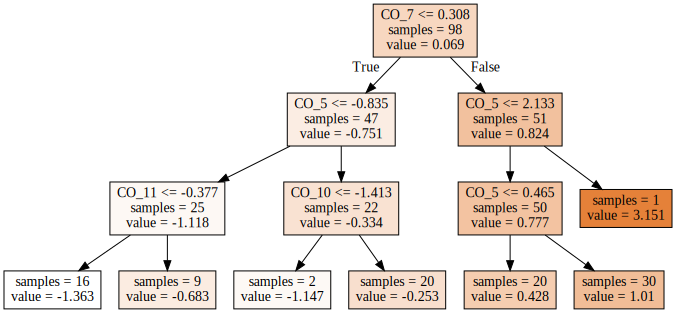

In [33]:
import graphviz
with open("tree_CO2.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### ExtraTreesRegressor

In [42]:
param_grid_ExtraTrees = {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400]}
print("Parameter grid:\n{}".format(param_grid_ExtraTrees))

Parameter grid:
{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400]}


In [43]:
from sklearn.ensemble import ExtraTreesRegressor
ExtTree = GridSearchCV(ExtraTreesRegressor(), param_grid_ExtraTrees, cv=5)
ExtTree.fit(X_train, y_train)
print("Extra Trees:")
print("Best parameters: {}".format(ExtTree.best_params_))
print("Best cross-validation score: {:.4f}".format(ExtTree.best_score_))
print("Корреляция на тестовом наборе R^2: {:.4f}".format(ExtTree.score(X_test, y_test)))
print("Корреляция на обучающем наборе R^2: {:.4f}".format(ExtTree.score(X_train, y_train)))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Extra Trees:
Best parameters: {'n_estimators': 300}
Best cross-validation score: 0.6474
Корреляция на тестовом наборе R^2: 0.3780
Корреляция на обучающем наборе R^2: 1.0000


In [44]:
y_pred_ExtTree = ExtTree.predict(X)

In [45]:
print("Extra Trees Test-set R^2 = {:.4f}".format(ExtTree.score(X_test, y_test)), ", Extra Trees training set = {:.4f}".format(ExtTree.score(X_train, y_train)))
print("Extra Trees RSME = {:.4f}".format(np.sqrt(mean_squared_error(y, y_pred_ExtTree))))
print("Extra Trees MAE = {:.4f}".format(mean_absolute_error(y, y_pred_ExtTree)))

Extra Trees Test-set R^2 = 0.3780 , Extra Trees training set = 1.0000
Extra Trees RSME = 0.4272
Extra Trees MAE = 0.1669


### KNeighbors

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [19]:
from sklearn.neighbors import KNeighborsRegressor
KNeighborsReg = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
KNeighborsReg.fit(X_train, y_train)
print("K-Neighbors:")
print("Best parameters: {}".format(KNeighborsReg.best_params_))
print("Best cross-validation score: {:.4f}".format(KNeighborsReg.best_score_))
print("Корреляция на тестовом наборе R^2: {:.4f}".format(KNeighborsReg.score(X_test, y_test)))
print("Корреляция на обучающем наборе R^2: {:.4f}".format(KNeighborsReg.score(X_train, y_train)))

K-Neighbors:
Best parameters: {'n_neighbors': 8}
Best cross-validation score: 0.5637
Корреляция на тестовом наборе R^2: 0.4228
Корреляция на обучающем наборе R^2: 0.7366


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [20]:
y_pred_KNeighbors = KNeighborsReg.predict(X)

In [22]:
print("KNeighbors Test-set R^2 = {:.4f}".format(KNeighborsReg.score(X_test, y_test)), ", KNeighbors training set = {:.4f}".format(KNeighborsReg.score(X_train, y_train)))
print("KNeighbors RSME = {:.4f}".format(np.sqrt(mean_squared_error(y, y_pred_KNeighbors))))
print("KNeighbors MAE = {:.4f}".format(mean_absolute_error(y, y_pred_KNeighbors)))

KNeighbors Test-set R^2 = 0.4228 , KNeighbors training set = 0.7366
KNeighbors RSME = 0.5937
KNeighbors MAE = 0.4386
